# MATH 248 Project

## The trajectory of a projectile

An airgun shot a pellet with a mass $m$ at an angle $\theta$ into the air. The speed of the pellet is $v_0$ and the position is $(0, y_0)$ when it leaves the barrel. Assuming the air resistance is proportional to the velocity with a coefficient $r$. Let $x(t)$ and $y(t)$ be the horizontal and vertical position (i.e, the x- and y-coordinates) of the pellet at time $t$.

* The horizontal direction: the air resistance is the only force. According to Newton's second law of motion, 
$$\ddot x(t) = -\frac{r}{m}\dot x(t)$$

* The vertical direction: two forces act on the pellet, the air resistance and the gravity. Let $g$ be the gravitational constant, 
$$\ddot y(t) = -g -\frac{r}{m}\dot y(t)$$

The trajectory is the parametric curve $(x(t), y(t))$. Find the solutions $x(t)$ and $y(t)$ using symbolic calculations. 


In [68]:
from sympy import *
from numpy import pi
from matplotlib.pyplot import plot
x = Function("x")
y = Function("y")
r, m, g, t = symbols("r, m, g, t")
x0, y0, v0 = symbols("x0, y0, v0")
theta, dx0, dy0 = symbols("theta, d_x, d_y")


hor = diff(x(t),t,2)+(r/m)*diff(x(t),t)
ve = diff(y(t),t,2)+g+(r/m)*diff(y(t),t)

solh = dsolve(hori)
display(solh)

solv = dsolve(ver)   
display(solv)


hori = Eq(hor, 0)
x_t = simplify(dsolve(hori, ics={x(0):x0, x(t).diff("t").subs({t:0}):dx0}))
display(x_t)

ver = Eq(ve, 0)
y_t = simplify(dsolve(ver, ics={y(0):y0, y(t).diff("t").subs({t:0}):dy0}))
display(y_t)

Eq(x(t), C1 + C2*exp(-r*t/m))

Eq(y(t), C1 + C2*exp(-r*t/m) - g*m*t/r)

Eq(x(t), d_x*m/r - d_x*m*exp(-r*t/m)/r + x0)

Eq(y(t), d_y*m/r - d_y*m*exp(-r*t/m)/r + g*m**2/r**2 - g*m**2*exp(-r*t/m)/r**2 - g*m*t/r + y0)

## Maximum range

Consider the following parameter values: the friction coefficient $r=0.001$, the mass of the pellet is $m=14.3$ grain $\approx 9.3\times 10^{-4}$ kilogram, the initial position of the pellet is $x_0=0$, $y_0=2$, the initial velocity is $v_0=274$ meters per second.

For any given $\theta$, numerically find the time $T$ the pellet hitting the ground, i.e., $y(T)=0$. In general, this defines a numerical function $T(\theta)$. The maximum range is $R_M=x(T)$.

Note that, because $T$ is a function of $\theta$, so is $R_M$. Plot $R_M(\theta)$ for $0\leq\theta\leq90^\circ$

* Hint: The function $y(t)=0$ cannot be solved symbolically as this is a transcendental function. You need to solve it numerically, e.g., using **fsolve**.

In [69]:
from numpy import linspace
from scipy.optimize import fsolve
from scipy.constants import g as G
from math import sin,cos
def Ti(theta):
    soly = dsolve(ver ,ics={y(0):2, y(t).diff("t").subs({t:0}):274*sin(theta)})
    soly2 = Eq(soly.args[1],0)
    
    display(soly2)

    yt = soly2.subs({r:0.001, g:G, m: 9.3*10e-4}) 
    display(yt.lhs)

    yt2 = lambdify(t,yt.lhs)
    print(fsolve(yt2,10))
    


In [70]:

print(Ti(0))


Eq(-g*m**2*exp(-r*t/m)/r**2 - g*m*t/r + (g*m**2 + 2.0*r**2)/r**2, 0)

-91.201845*t + 850.1771585 - 848.1771585*exp(-0.10752688172043*t)

[0.64605414]
None


In [71]:

def maxi(theta):
    solx = dsolve(hori ,ics={x(0):0, x(t).diff("t").subs({t:0}):274*cos(theta)})
    solx
    xx= solx.args[1]
    xt = lambdify(t,xx.subs({r:0.001, g:9.8, m: 9.3e-4}))
    
    
    soly = dsolve(ver ,ics={y(0):2, y(t).diff("t").subs({t:0}):274*sin(theta)})
    soly2 = Eq(soly.args[1],0)
    yt = soly2.subs({r:0.001, g:G, m: 9.3*10e-4}) 
    yt2 = lambdify(t,yt.lhs)
    T = (fsolve(yt2,100))
    return xt(T)



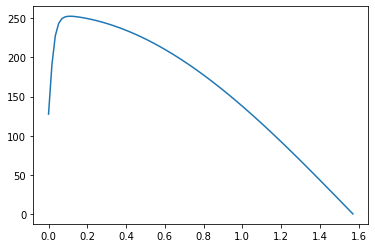

In [72]:
from numpy import zeros
thetav = linspace(0,pi/2,91)
list1 = zeros(91)
for i in range(91):
    list1[i] = maxi(thetav[i])
plot(thetav,list1)

## Effective range

The speed of a pellet can be computed as
$$
v(t) = \sqrt{\dot x^2(t)+\dot y^2(t)}
$$

A pellet can penetrate human skin at a speed about 100 meters/second.  Find the largest time $T_e$ such that
$v(T_e)\geq100$ and $y(T_e)\geq0$. Then the effective range is

$$R_e = \sqrt{x^2(T_e)+y^2(T_e)}$$

Plot $R_e$ as a function of $\theta$ for $0\leq\theta\leq15^\circ$

* Hint: $T_e$ is the earlier one of the two time $T_{100}$ when $v(T_{100})=100$ and $T_M$ when the pellet hit the ground.

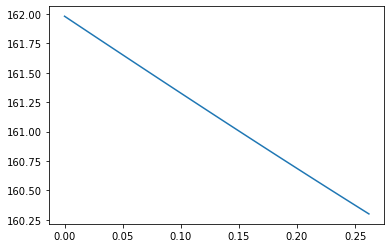

In [73]:
def effective(theta):
    
    dy = y_t.rhs
    yt = lambdify(t, dy.subs({r:0.001, m:9.3e-4, g:G, y0:2, v0:274, dy0:v0*sin(theta)}))
    
    dx = x_t.rhs
    xt = lambdify(t, dx.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
    
    diffy = diff(y_t.rhs, t)
    diffx = diff(x_t.rhs, t)
    
    v_t100 = (diffx**2+diffy**2)**0.5-100
    vt = lambdify(t, v_t100.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
    
    ti = fsolve(vt, x0=1)[0]
    
    Re = (xt(ti)**2+yt(ti)**2)**0.5
    
    return Re

theta2 = linspace(0, pi/12, 100)
list2 = zeros(100)

for j in range(100):
    list2[j] = effective(theta2[j])
    
plot(theta2, list2)

## Animation

Make an animation showing how the trajectory changes with $\theta$, for $\theta=0^\circ, 1^\circ, ..., 45^\circ$. For each frame (a $\theta$ value), plot two curves:
* the full trajectory as a blue curve, i.e., parametric curve $(x(t), y(t))$ for $0\leq t\leq T$ until the pellet hit the ground at time $T$.
* the effective part of the trajectory as a red curve, i.e., $(x(t), y(t))$ for $0\leq t\leq T_e$ until the pellet has a velocty equal to 100 meters per second at time $T_e$.

TypeError: can't convert expression to float

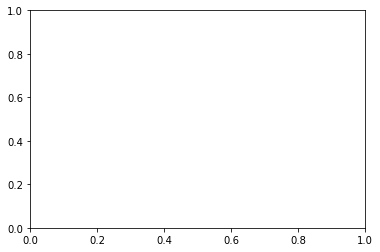

In [11]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import subplots
from numpy import real, imag, linspace, sin, cos
from math import pi
from numpy import linspace
from matplotlib.pyplot import plot

theta = linspace(0,45,45)
fig = subplots()
points = plot(x(theta), y(theta), '--b', [], [], "b*", [], [], "ro")

def update(theta):
    points[1].set_data([x(theta)],[y(theta)])
    
anim = FuncAnimation(fig, update, frames= theta)



In [12]:
HTML(anim.to_html5_video())

NameError: name 'anim' is not defined

TypeError: can't convert expression to float

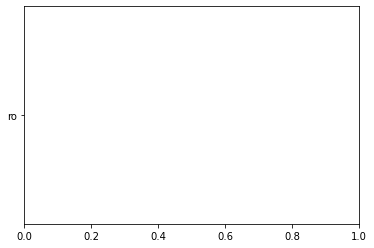

In [18]:
fig2 = subplots()
points = plot(x(theta), y(theta), '--b', [], [], "b*","ro")

def update(theta):
    points[1].set_data([x(theta)],[y(theta)])
    
anim = FuncAnimation(fig, update, frames= theta)

